# Metody Eksploracji Danych - Projekt

**Zespół:**

1. Jakub Korczakowski, nr albumu 291079
2. Piotr Rosa, nr albumu 291112

### Opis projektu
**Zbiór danych:**

Zbiór danych, który będziemy analizować opisuje amerykańskie społeczności oraz posterunki policji w kontekście ilości popełnionych przestępstw.

Nieznormalizowany, którego będziemy używac do eksploracyjnej analizy danych: Communities and Crime Data Set
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

Znormalizowany, którego będziemy używac przy uczeniu: Communities and Crime Data Set

https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

### Cel:
Znalezienie współczynnika ilości przestępstw.

## Eksploracyjna analiza danych 

### Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import math
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

### Wczytanie danych nieznormalizowanych

In [3]:
columns = ["communityname" , "state" , "countyCode" , "communityCode" , "fold" , "population" , "householdsize" , "racepctblack" , "racePctWhite" , "racePctAsian" , "racePctHisp" , "agePct12t21" , "agePct12t29" , "agePct16t24" , "agePct65up" , "numbUrban" , "pctUrban" , "medIncome" , "pctWWage" , "pctWFarmSelf" , "pctWInvInc" , "pctWSocSec" , "pctWPubAsst" , "pctWRetire" , "medFamInc" , "perCapInc" , "whitePerCap" , "blackPerCap" , "indianPerCap" , "AsianPerCap" , "OtherPerCap" , "HispPerCap" , "NumUnderPov" , "PctPopUnderPov" , "PctLess9thGrade" , "PctNotHSGrad" , "PctBSorMore" , "PctUnemployed" , "PctEmploy" , "PctEmplManu" , "PctEmplProfServ" , "PctOccupManu" , "PctOccupMgmtProf" , "MalePctDivorce" , "MalePctNevMarr" , "FemalePctDiv" , "TotalPctDiv" , "PersPerFam" , "PctFam2Par" , "PctKids2Par" , "PctYoungKids2Par" , "PctTeen2Par" , "PctWorkMomYoungKids" , "PctWorkMom" , "NumKidsBornNeverMar" , "PctKidsBornNeverMar" , "NumImmig" , "PctImmigRecent" , "PctImmigRec5" , "PctImmigRec8" , "PctImmigRec10" , "PctRecentImmig" , "PctRecImmig5" , "PctRecImmig8" , "PctRecImmig10" , "PctSpeakEnglOnly" , "PctNotSpeakEnglWell" , "PctLargHouseFam" , "PctLargHouseOccup" , "PersPerOccupHous" , "PersPerOwnOccHous" , "PersPerRentOccHous" , "PctPersOwnOccup" , "PctPersDenseHous" , "PctHousLess3BR" , "MedNumBR" , "HousVacant" , "PctHousOccup" , "PctHousOwnOcc" , "PctVacantBoarded" , "PctVacMore6Mos" , "MedYrHousBuilt" , "PctHousNoPhone" , "PctWOFullPlumb" , "OwnOccLowQuart" , "OwnOccMedVal" , "OwnOccHiQuart" , "OwnOccQrange" , "RentLowQ" , "RentMedian" , "RentHighQ" , "RentQrange" , "MedRent" , "MedRentPctHousInc" , "MedOwnCostPctInc" , "MedOwnCostPctIncNoMtg" , "NumInShelters" , "NumStreet" , "PctForeignBorn" , "PctBornSameState" , "PctSameHouse85" , "PctSameCity85" , "PctSameState85" , "LemasSwornFT" , "LemasSwFTPerPop" , "LemasSwFTFieldOps" , "LemasSwFTFieldPerPop" , "LemasTotalReq" , "LemasTotReqPerPop" , "PolicReqPerOffic" , "PolicPerPop" , "RacialMatchCommPol" , "PctPolicWhite" , "PctPolicBlack" , "PctPolicHisp" , "PctPolicAsian" , "PctPolicMinor" , "OfficAssgnDrugUnits" , "NumKindsDrugsSeiz" , "PolicAveOTWorked" , "LandArea" , "PopDens" , "PctUsePubTrans" , "PolicCars" , "PolicOperBudg" , "LemasPctPolicOnPatr" , "LemasGangUnitDeploy" , "LemasPctOfficDrugUn" , "PolicBudgPerPop" , "murders" , "murdPerPop" , "rapes" , "rapesPerPop" , "robberies" , "robbbPerPop" , "assaults" , "assaultPerPop" , "burglaries" , "burglPerPop" , "larcenies" , "larcPerPop" , "autoTheft" , "autoTheftPerPop" , "arsons" , "arsonsPerPop" , "ViolentCrimesPerPop" , "nonViolPerPop"]
dataset = pd.read_csv("../Data/CommViolPredUnnormalizedData.txt", names=columns)

In [4]:
dataset.shape

(2215, 147)

In [5]:
dataset.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


### Sprawdzenie stopnia wypełnienia danych

Zamiana znaku ``?`` na wartość ``np.nan``.

In [6]:
dataset.replace("?", np.nan, inplace=True)

In [7]:
dataset.info(verbose=False, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, communityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


Zmiana kolumn typu ``object`` na typ ``numeric``.

In [8]:
for column in dataset.columns:
    if (column not in ["communityname", "state"]) and (dataset[column].dtype == object): 
        dataset[column] = pd.to_numeric(dataset[column])

In [9]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 147 columns):
communityname            2215 non-null object
state                    2215 non-null object
countyCode               994 non-null float64
communityCode            991 non-null float64
fold                     2215 non-null int64
population               2215 non-null int64
householdsize            2215 non-null float64
racepctblack             2215 non-null float64
racePctWhite             2215 non-null float64
racePctAsian             2215 non-null float64
racePctHisp              2215 non-null float64
agePct12t21              2215 non-null float64
agePct12t29              2215 non-null float64
agePct16t24              2215 non-null float64
agePct65up               2215 non-null float64
numbUrban                2215 non-null int64
pctUrban                 2215 non-null float64
medIncome                2215 non-null int64
pctWWage                 2215 non-null float64
pctWFarmSel

In [10]:
number_o_nulls = dataset.isna().sum(axis=0)
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 1000:
        print(dataset.columns[i], number_o_nulls[i])

countyCode 1221
communityCode 1224
LemasSwornFT 1872
LemasSwFTPerPop 1872
LemasSwFTFieldOps 1872
LemasSwFTFieldPerPop 1872
LemasTotalReq 1872
LemasTotReqPerPop 1872
PolicReqPerOffic 1872
PolicPerPop 1872
RacialMatchCommPol 1872
PctPolicWhite 1872
PctPolicBlack 1872
PctPolicHisp 1872
PctPolicAsian 1872
PctPolicMinor 1872
OfficAssgnDrugUnits 1872
NumKindsDrugsSeiz 1872
PolicAveOTWorked 1872
PolicCars 1872
PolicOperBudg 1872
LemasPctPolicOnPatr 1872
LemasGangUnitDeploy 1872
PolicBudgPerPop 1872


W przypadku, gdy w kolumnie brakuje więcej niż ``500`` rekordów, decydujemy się nie używać jej przy uczeniu naszego modelu. 

W przypadku, gdy w kolumnie brakuje mniej niż ``500`` rekordów, decydujemy sie nie używać rekordów zawierających braki.

Najwięcej brakujących danych dotyczy policji, w tym danych o wyposażeniu komisariatów, pochodzeniu funkcjonariuszy oraz liczbie patroli.

In [11]:
for i in range (0, dataset.shape[1]):
    if number_o_nulls[i] > 0:
        print(dataset.columns[i], number_o_nulls[i])

countyCode 1221
communityCode 1224
OtherPerCap 1
LemasSwornFT 1872
LemasSwFTPerPop 1872
LemasSwFTFieldOps 1872
LemasSwFTFieldPerPop 1872
LemasTotalReq 1872
LemasTotReqPerPop 1872
PolicReqPerOffic 1872
PolicPerPop 1872
RacialMatchCommPol 1872
PctPolicWhite 1872
PctPolicBlack 1872
PctPolicHisp 1872
PctPolicAsian 1872
PctPolicMinor 1872
OfficAssgnDrugUnits 1872
NumKindsDrugsSeiz 1872
PolicAveOTWorked 1872
PolicCars 1872
PolicOperBudg 1872
LemasPctPolicOnPatr 1872
LemasGangUnitDeploy 1872
PolicBudgPerPop 1872
rapes 208
rapesPerPop 208
robberies 1
robbbPerPop 1
assaults 13
assaultPerPop 13
burglaries 3
burglPerPop 3
larcenies 3
larcPerPop 3
autoTheft 3
autoTheftPerPop 3
arsons 91
arsonsPerPop 91
ViolentCrimesPerPop 221
nonViolPerPop 97


### Opis danych z podziałem na tematykę

W celu lepszej obserwacji danych podzielimy dane ze względu na tematykę.

#### Populacja

Pierwsza część obserwacji dotyczy pochodzenia etnicznego oraz wieku populacji.

In [12]:
dataset_population = dataset.loc[:, 'population':'pctUrban']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_population_with_crimes = pd.concat([dataset_population, viol_crimes], axis=1)
dataset_population_with_crimes.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,ViolentCrimesPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,41.02
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,127.56
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,218.59
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,306.64
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,NaN


In [13]:
dataset_population.describe().T

,count,mean,std,min,25%,50%,75%,max
population,2215.0,53117.984199,204620.252853,10005.00,14366.000,22792.00,43024.000,7322564.00
householdsize,2215.0,2.707327,0.334120,1.60,2.500,2.66,2.850,5.28
racepctblack,2215.0,9.335102,14.247156,0.00,0.860,2.87,11.145,96.67
racePctWhite,2215.0,83.979819,16.419080,2.68,76.320,90.35,96.225,99.63
racePctAsian,2215.0,2.670203,4.473843,0.03,0.620,1.23,2.670,57.46
racePctHisp,2215.0,7.950176,14.589832,0.12,0.930,2.18,7.810,95.29
agePct12t21,2215.0,14.445837,4.518623,4.58,12.250,13.62,15.360,54.40
agePct12t29,2215.0,27.644840,6.181517,9.38,24.415,26.78,29.205,70.51
agePct16t24,2215.0,13.975142,5.970747,4.64,11.320,12.54,14.345,63.62
agePct65up,2215.0,11.836393,4.777565,1.66,8.750,11.73,14.415,52.77


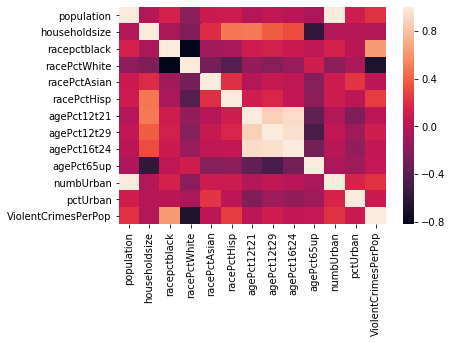

In [14]:
sns.heatmap(dataset_population_with_crimes.corr())

Biorąc pod uwagę dane dotyczące pochodzenia etnicznego oraz wieku populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``racepctblack``, ``racePctHisp`` oraz ``population``. Odwrotnie powiązany ze zmienną jest współczynnik ``racePctWhite``.

#### Dochód

Część obserwacji dotyczy dochodów.

In [15]:
dataset_income = dataset.loc[:, 'medIncome':'PctPopUnderPov']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_income_with_crimes = pd.concat([dataset_income, viol_crimes], axis=1)
dataset_income_with_crimes.head()

,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,ViolentCrimesPerPop
0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,41.02
1,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,127.56
2,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,218.59
3,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,306.64
4,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,NaN


In [16]:
dataset_income.describe().T

,count,mean,std,min,25%,50%,75%,max
medIncome,2215.0,33984.696163,13424.680011,8866.00,23817.000,31441.00,41480.500,123625.00
pctWWage,2215.0,78.312758,7.950672,31.68,73.400,78.61,84.030,96.76
pctWFarmSelf,2215.0,0.881842,0.689006,0.00,0.460,0.69,1.100,6.53
pctWInvInc,2215.0,43.750935,12.787925,5.81,34.680,42.88,52.740,89.04
pctWSocSec,2215.0,26.409418,8.295604,4.81,20.770,26.59,31.715,76.39
pctWPubAsst,2215.0,6.801445,4.700335,0.18,3.270,5.61,9.105,44.82
pctWRetire,2215.0,15.969002,4.622553,3.46,12.875,15.65,18.755,45.51
medFamInc,2215.0,39857.055079,14251.206032,10447.00,29538.000,36678.00,46999.000,139008.00
perCapInc,2215.0,15603.524605,6281.558523,5237.00,11602.500,14101.00,17795.000,63302.00
whitePerCap,2215.0,16567.698420,6346.840251,5472.00,12610.500,15073.00,18609.500,68850.00


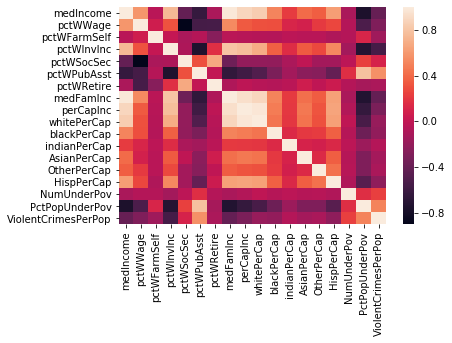

In [17]:
sns.heatmap(dataset_income_with_crimes.corr())

Biorąc pod uwagę dane dotyczące dochodu populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``pctWPubAsst``, ``NumUnderPov`` oraz ``PctPopUnderPov``. Odwrotnie powiązany ze zmienną jest współczynnik ``pctWInvInc``.

#### Edukacja oraz zatrudnienie

Kolejna część obserwacji dotyczy edukacji oraz zatrudnienia.

In [18]:
dataset_education = dataset.loc[:, 'PctLess9thGrade':'PctOccupMgmtProf']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_education_with_crimes = pd.concat([dataset_education, viol_crimes], axis=1)
dataset_education_with_crimes.head()

,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,ViolentCrimesPerPop
0,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,41.02
1,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,127.56
2,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,218.59
3,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,306.64
4,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,NaN


In [19]:
dataset_education.describe().T

,count,mean,std,min,25%,50%,75%,max
PctLess9thGrade,2215.0,9.186646,6.666703,0.20,4.640,7.74,11.835,49.89
PctNotHSGrad,2215.0,22.305120,10.989517,1.46,13.920,21.38,29.195,73.66
PctBSorMore,2215.0,23.056876,12.687213,1.63,14.095,19.65,29.055,79.18
PctUnemployed,2215.0,6.045242,2.895618,1.32,4.045,5.45,7.440,31.23
PctEmploy,2215.0,62.021612,8.312045,24.82,56.490,62.44,67.825,84.67
PctEmplManu,2215.0,18.228907,8.099281,2.05,12.215,17.30,23.400,50.03
PctEmplProfServ,2215.0,24.532298,6.659470,8.69,20.075,23.39,27.590,62.67
PctOccupManu,2215.0,13.819165,6.430264,1.37,9.130,13.15,17.665,44.27
PctOccupMgmtProf,2215.0,28.209201,9.326123,6.48,21.910,26.24,32.815,64.97


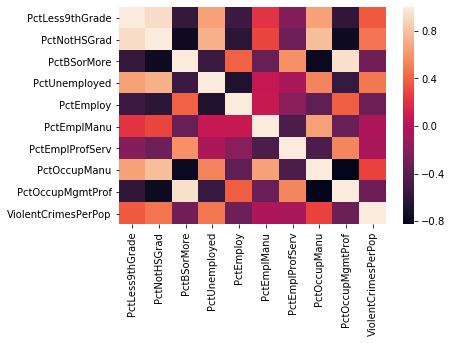

In [20]:
sns.heatmap(dataset_education_with_crimes.corr())

Biorąc pod uwagę dane dotyczące edukacji oraz zatrudnienia populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctNotHSGrad``, ``PctLess9thGrade``, ``PctOccupManu``, oraz ``PctUnemployed``.

#### Życie rodzinne

Kolejna część obserwacji dotyczy życia rodzinnego.

In [21]:
dataset_family = dataset.loc[:, 'MalePctDivorce':'PctKidsBornNeverMar']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_family_with_crimes = pd.concat([dataset_family, viol_crimes], axis=1)
dataset_family_with_crimes.head()

,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,ViolentCrimesPerPop
0,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,41.02
1,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,127.56
2,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,218.59
3,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,306.64
4,7.51,50.66,11.64,9.73,2.98,58.59,55.20,66.51,79.17,61.22,68.94,402,4.70,NaN


In [22]:
dataset_family.describe().T

,count,mean,std,min,25%,50%,75%,max
MalePctDivorce,2215.0,9.127585,2.802747,2.13,7.110,9.15,11.050,20.08
MalePctNevMarr,2215.0,30.683517,8.127991,12.06,25.450,29.00,33.410,76.60
FemalePctDiv,2215.0,12.325300,3.262613,3.35,9.860,12.52,14.745,23.92
TotalPctDiv,2215.0,10.812515,3.000883,2.83,8.575,10.90,12.985,22.23
PersPerFam,2215.0,3.129698,0.240743,2.29,2.990,3.10,3.220,4.64
PctFam2Par,2215.0,74.059129,10.525952,22.97,67.900,75.03,81.900,93.60
PctKids2Par,2215.0,71.227255,12.045048,18.30,63.990,72.53,80.395,92.58
PctYoungKids2Par,2215.0,81.865422,12.263736,8.70,74.780,83.99,91.675,100.00
PctTeen2Par,2215.0,75.521788,10.365262,20.20,70.170,76.92,82.765,97.34
PctWorkMomYoungKids,2215.0,60.542641,8.008937,24.42,55.430,60.71,65.985,87.97


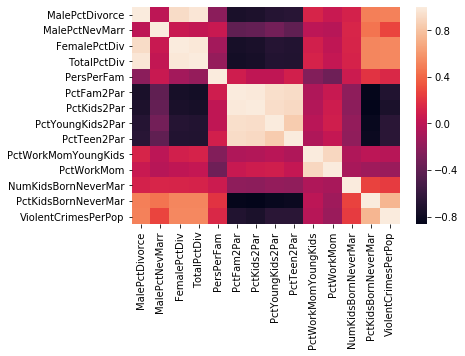

In [23]:
sns.heatmap(dataset_family_with_crimes.corr())

Biorąc pod uwagę dane dotyczące życia rodzinnego populacji największe powiązanie z ilością przestępstw wykazują współczynniki 
``MalePctDivorce``, ``FemalePctDiv``, ``PctKidsBornNeverMar`` , oraz ``TotalPctDiv``. Odwrotnie powiązane ze zmienną są współczynniki ``PctKids2Par``, ``PctKids2Par``, ``PctYoungKids2Par`` oraz ``PctTeen2Par``. Wspomniane współczynniki są mocno powiązane ze zmienną objaśnianą.

#### Imigranci

Kolejna część obserwacji dotyczy imigrantów oraz znajomości języka angielskiego.

In [24]:
dataset_immigration = dataset.loc[:, 'NumImmig':'PctNotSpeakEnglWell']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_immigration_with_crimes = pd.concat([dataset_immigration, viol_crimes], axis=1)
dataset_immigration_with_crimes.head()

,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
0,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,41.02
1,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,127.56
2,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,218.59
3,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,306.64
4,196,46.94,56.12,67.86,69.90,0.82,0.98,1.18,1.22,94.64,0.39,NaN


In [25]:
dataset_immigration.describe().T

,count,mean,std,min,25%,50%,75%,max
NumImmig,2215.0,6277.273589,55419.653828,20.00,400.000,1024.00,3302.000,2082931.00
PctImmigRecent,2215.0,13.525693,9.780098,0.00,6.695,12.26,17.950,64.29
PctImmigRec5,2215.0,20.421287,12.410355,0.00,11.255,19.08,27.445,76.16
PctImmigRec8,2215.0,27.544181,14.368813,0.00,17.205,26.72,36.495,80.81
PctImmigRec10,2215.0,34.733928,16.327322,0.00,22.725,34.79,46.185,88.00
PctRecentImmig,2215.0,1.099124,1.595766,0.00,0.170,0.50,1.310,13.71
PctRecImmig5,2215.0,1.697463,2.461060,0.00,0.280,0.75,2.015,19.93
PctRecImmig8,2215.0,2.307503,3.286648,0.00,0.390,1.04,2.700,25.34
PctRecImmig10,2215.0,2.943761,4.246468,0.00,0.520,1.31,3.455,32.63
PctSpeakEnglOnly,2215.0,87.074993,14.076087,6.15,84.380,92.18,95.455,98.98


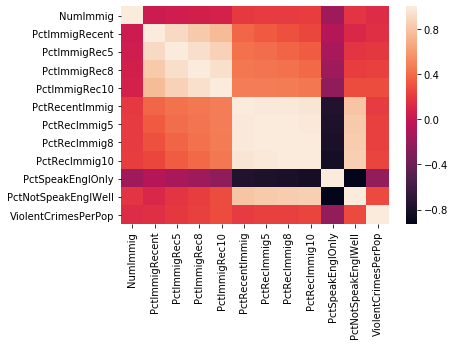

In [26]:
sns.heatmap(dataset_immigration_with_crimes.corr())

Biorąc pod uwagę pochodzenie populacji widzimy, że ma ono znaczny wpływ na ilość przestępstw. Wśród nich największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctNotSpeakEnglWell`` oraz ``PctImmigRec10``. 
Odwrotnie powiązany ze zmienną jest współczynnik ``PctSpeakEnglOnly``.

#### Warunki zamieszkania

Kolejna część obserwacji dotyczy warunków w jakich mieszka populacja.

In [27]:
dataset_living_condition = dataset.loc[:, 'PctLargHouseFam':'MedNumBR']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_living_condition_with_crimes = pd.concat([dataset_living_condition, viol_crimes], axis=1)
dataset_living_condition_with_crimes.head()

,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,ViolentCrimesPerPop
0,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,41.02
1,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,127.56
2,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,218.59
3,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,306.64
4,5.23,3.11,2.35,2.55,2.12,58.13,2.94,55.64,2,NaN


In [28]:
dataset_living_condition.describe().T

,count,mean,std,min,25%,50%,75%,max
PctLargHouseFam,2215.0,5.386619,3.794309,0.96,3.390,4.28,5.870,34.87
PctLargHouseOccup,2215.0,3.915788,3.175770,0.44,2.370,3.05,4.210,30.87
PersPerOccupHous,2215.0,2.615842,0.315646,1.58,2.410,2.57,2.770,4.52
PersPerOwnOccHous,2215.0,2.740483,0.297421,1.61,2.550,2.71,2.900,4.48
PersPerRentOccHous,2215.0,2.367138,0.391806,1.55,2.110,2.29,2.530,4.73
PctPersOwnOccup,2215.0,66.369454,14.182588,13.93,57.285,65.91,76.580,97.24
PctPersDenseHous,2215.0,4.132438,5.599131,0.05,1.290,2.34,4.730,59.49
PctHousLess3BR,2215.0,45.405341,13.778347,3.06,37.505,46.39,53.515,95.34
MedNumBR,2215.0,2.640632,0.512686,1.00,2.000,3.00,3.000,4.00


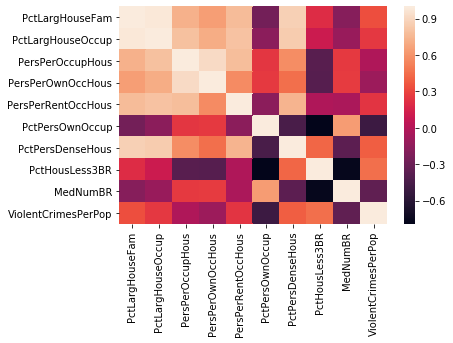

In [29]:
sns.heatmap(dataset_living_condition_with_crimes.corr())

Biorąc pod uwagę warunki zamieszkania populacji największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctHousLess3BR`` oraz ``PctPersDenseHous``. Odwrotnie powiązany ze zmienną jest współczynnik ``MedNumBR``.

#### Stan zabudowań

Kolejna część obserwacji dotyczy stanu zabudowań - czy są one zamieszkane, niezamieszkane, jak długo itp.

In [30]:
dataset_household = dataset.loc[:, 'HousVacant':'OwnOccQrange']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_household_with_crimes = pd.concat([dataset_household, viol_crimes], axis=1)
dataset_household_with_crimes.head()

,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,ViolentCrimesPerPop
0,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,41.02
1,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,127.56
2,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,218.59
3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,306.64
4,333,92.45,53.57,3.90,42.64,1958,7.45,0.82,30600,43200,59500,28900,NaN


In [31]:
dataset_household.describe().T

,count,mean,std,min,25%,50%,75%,max
HousVacant,2215.0,1748.368849,6503.866478,36.00,304.500,558.00,1228.000,172768.00
PctHousOccup,2215.0,92.933973,5.040736,37.47,91.290,94.21,96.020,99.00
PctHousOwnOcc,2215.0,63.368298,13.970057,16.86,54.820,62.83,72.645,96.49
PctVacantBoarded,2215.0,2.778524,3.592396,0.00,0.720,1.66,3.430,39.89
PctVacMore6Mos,2215.0,34.773887,13.911468,3.12,24.480,34.10,43.970,82.13
MedYrHousBuilt,2215.0,1962.623476,11.166555,1939.00,1956.000,1964.00,1971.000,1987.00
PctHousNoPhone,2215.0,4.289824,4.088175,0.00,0.905,2.85,6.805,23.88
PctWOFullPlumb,2215.0,0.425273,0.426188,0.00,0.160,0.32,0.555,5.33
OwnOccLowQuart,2215.0,88695.802257,66670.781534,14999.00,41500.000,65500.00,121500.000,500001.00
OwnOccMedVal,2215.0,113097.523251,81906.362277,19500.00,56200.000,82800.00,150600.000,500001.00


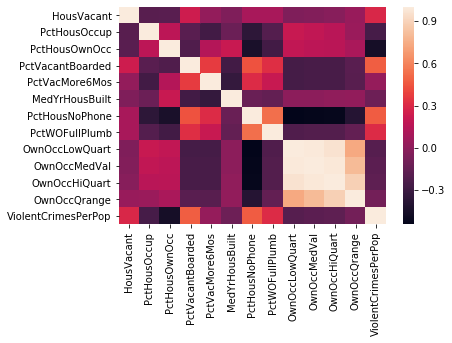

In [32]:
sns.heatmap(dataset_household_with_crimes.corr())

Biorąc pod uwagę stan zabudowań największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctVacantBoarded`` oraz ``PctHousNoPhone``. Odwrotnie powiązany ze zmienną jest współczynnik ``PctHousOwnOcc``.

#### Wysokość czynszu

Kolejna część obserwacji dotyczy wysokości czynszu np. jaką część dochodu on stanowi.

In [33]:
dataset_rent = dataset.loc[:, 'RentLowQ':'MedOwnCostPctIncNoMtg']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_rent_with_crimes = pd.concat([dataset_rent, viol_crimes], axis=1)
dataset_rent_with_crimes.head()

,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,ViolentCrimesPerPop
0,685,1001,1001,316,1001,23.8,21.1,14.0,41.02
1,467,560,672,205,627,27.6,20.7,12.5,127.56
2,370,428,520,150,484,24.1,21.7,11.6,218.59
3,195,250,309,114,333,28.7,20.6,14.5,306.64
4,202,283,362,160,332,32.2,23.2,12.9,NaN


In [34]:
dataset_rent.describe().T

,count,mean,std,min,25%,50%,75%,max
RentLowQ,2215.0,329.966591,144.138461,99.0,213.5,307.0,421.0,1001.0
RentMedian,2215.0,428.537246,170.706644,120.0,289.5,397.0,544.0,1001.0
RentHighQ,2215.0,527.252822,199.290780,182.0,366.0,486.0,659.5,1001.0
RentQrange,2215.0,197.286230,85.205688,0.0,139.0,171.0,232.5,803.0
MedRent,2215.0,501.466366,169.271735,192.0,364.0,467.0,615.0,1001.0
MedRentPctHousInc,2215.0,26.298104,2.979297,14.9,24.3,26.1,28.0,35.1
MedOwnCostPctInc,2215.0,20.990158,2.987622,14.0,18.7,21.0,23.1,32.7
MedOwnCostPctIncNoMtg,2215.0,13.010203,1.419679,10.1,12.0,12.8,13.7,23.4


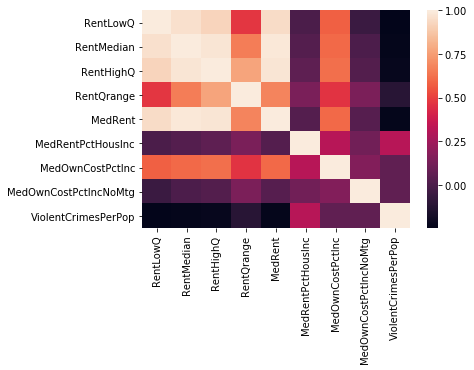

In [35]:
sns.heatmap(dataset_rent_with_crimes.corr())

Biorąc pod uwagę wysokość czynszu największe powiązanie z ilością przestępstw wykazuje współczynnik ``MedRentPctHousInc``.

#### Liczba osób bezdomnych

Kolejna część obserwacji dotyczy osób bezdomnych.

In [36]:
dataset_homeless = dataset.loc[:, 'NumInShelters':'NumStreet']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_homeless_with_crimes = pd.concat([dataset_homeless, viol_crimes], axis=1)
dataset_homeless_with_crimes.head()

,NumInShelters,NumStreet,ViolentCrimesPerPop
0,11,0,41.02
1,0,0,127.56
2,16,0,218.59
3,0,0,306.64
4,2,0,NaN


In [37]:
dataset_homeless.describe().T

,count,mean,std,min,25%,50%,75%,max
NumInShelters,2215.0,66.953499,564.253149,0.0,0.0,0.0,22.0,23383.0
NumStreet,2215.0,17.823476,245.452553,0.0,0.0,0.0,1.0,10447.0


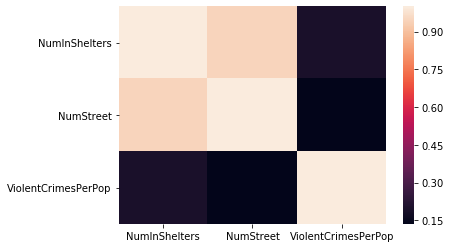

In [38]:
sns.heatmap(dataset_homeless_with_crimes.corr())

Biorąc pod uwagę liczbę osób bezdomnych widać, że nie są one znaczące dla objaśnianej zmiennej.

#### Miejsce urodzenia

Kolejna część obserwacji dotyczy miejsca urodzenia - czy osoby urodziły się w stanie w którym obecnie mieszkają itp.

In [39]:
dataset_born = dataset.loc[:, 'PctForeignBorn':'PctSameState85']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_born_with_crimes = pd.concat([dataset_born, viol_crimes], axis=1)
dataset_born_with_crimes.head()

,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,10.66,53.72,65.29,78.09,89.14,41.02
1,8.30,77.17,71.27,90.22,96.12,127.56
2,5.00,44.77,36.60,61.26,82.85,218.59
3,2.04,88.71,56.70,90.17,96.24,306.64
4,1.74,73.75,42.22,60.34,89.02,NaN


In [40]:
dataset_born.describe().T

,count,mean,std,min,25%,50%,75%,max
PctForeignBorn,2215.0,7.340302,8.418476,0.18,2.060,4.31,9.250,60.40
PctBornSameState,2215.0,61.539630,16.750061,6.75,50.110,64.49,74.855,93.14
PctSameHouse85,2215.0,51.538596,10.517926,11.83,44.995,52.17,58.740,78.56
PctSameCity85,2215.0,77.411079,10.878186,27.95,72.060,79.49,85.135,96.59
PctSameState85,2215.0,88.111865,7.287836,32.83,85.200,90.03,93.010,99.90


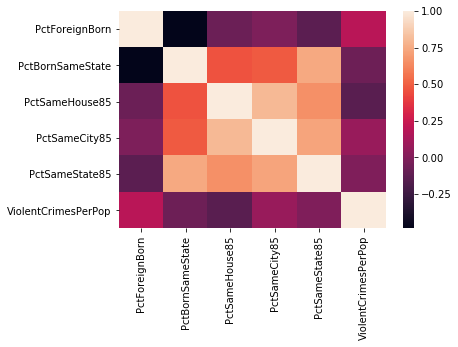

In [41]:
sns.heatmap(dataset_born_with_crimes.corr())

Biorąc pod uwagę miejsce urodzenia współczynniki nie mają zbyt dużego wpływu na ilość przestępstw. Najbardziej z nich powiązany jest współczynnik ``PctForeignBorn``.

#### Policjanci

Kolejna część obserwacji dotyczy policjantów - m.in. liczba policjantów na 100 tys. osób w populacji.

In [42]:
dataset_police = dataset.loc[:, 'LemasSwornFT':'PolicPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_police_with_crimes = pd.concat([dataset_police, viol_crimes], axis=1)
dataset_police_with_crimes.head()

,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,ViolentCrimesPerPop
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.02
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.56
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.59
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.64
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
dataset_police.describe().T

,count,mean,std,min,25%,50%,75%,max
LemasSwornFT,343.0,499.198251,1681.472251,65.00,131.000,173.00,314.000,25655.00
LemasSwFTPerPop,343.0,246.490962,273.799162,29.40,149.115,196.01,260.650,3437.23
LemasSwFTFieldOps,343.0,432.559767,1493.708385,14.00,114.000,152.00,285.500,22496.00
LemasSwFTFieldPerPop,343.0,210.844781,235.478815,19.21,132.245,170.27,226.815,3290.62
LemasTotalReq,343.0,252404.988338,689449.781653,2100.00,49864.500,90000.00,171923.500,8328470.00
LemasTotReqPerPop,343.0,120651.718892,148211.342163,2704.80,64845.050,91034.60,130324.650,1926281.50
PolicReqPerOffic,343.0,523.658309,307.839007,20.80,343.350,443.20,637.250,2162.50
PolicPerPop,343.0,246.493586,273.798409,29.40,149.150,196.00,260.650,3437.20


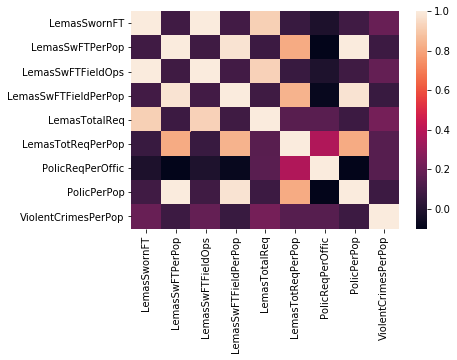

In [44]:
sns.heatmap(dataset_police_with_crimes.corr())

Dane dotyczące liczby policjantów mają znaczne braki i niekoniecznie oddają rzeczywisty charakter całości zbioru. Widać jednak, że współczynniki nie wpływają zbytnio na zmienną objaśnianą.

#### Rasa policjantów

Kolejna część obserwacji dotyczy procentu policjantów, jaki stanowią poszczególne rasy ludzkie.

In [45]:
dataset_race = dataset.loc[:, 'RacialMatchCommPol':'PctPolicMinor']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_race_with_crimes = pd.concat([dataset_race, viol_crimes], axis=1)
dataset_race_with_crimes.head()

,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,ViolentCrimesPerPop
0,NaN,NaN,NaN,NaN,NaN,NaN,41.02
1,NaN,NaN,NaN,NaN,NaN,NaN,127.56
2,NaN,NaN,NaN,NaN,NaN,NaN,218.59
3,NaN,NaN,NaN,NaN,NaN,NaN,306.64
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dataset_race.describe().T

,count,mean,std,min,25%,50%,75%,max
RacialMatchCommPol,343.0,85.499679,10.941312,42.15,79.435,87.93,93.645,100.00
PctPolicWhite,343.0,82.515831,15.332612,1.60,76.230,86.18,93.340,100.00
PctPolicBlack,343.0,9.263294,11.021424,0.00,2.020,5.00,14.065,67.31
PctPolicHisp,343.0,5.459767,10.604533,0.00,0.415,2.04,6.215,98.40
PctPolicAsian,343.0,0.681283,1.706344,0.00,0.000,0.00,0.650,18.57
PctPolicMinor,343.0,15.242245,14.826756,0.00,4.950,11.37,19.740,98.40


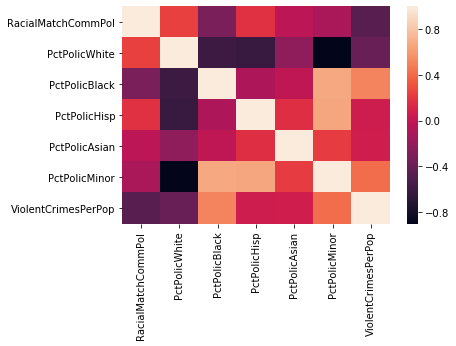

In [47]:
sns.heatmap(dataset_race_with_crimes.corr())

Te dane również są znacznie wybrakowane. Największe powiązanie z ilością przestępstw wykazuje współczynnik ``PctPolicBlack``. Odwrotnie powiązany ze zmienna jest współczynnik ``RacialMatchCommPol	``

#### Pozostałe atrybuty

Ostatnia część obserwacji to połączone pozostałe atrybuty zbioru.

In [48]:
dataset_other = dataset.loc[:, 'OfficAssgnDrugUnits':'PolicBudgPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_other_with_crimes = pd.concat([dataset_other, viol_crimes], axis=1)
dataset_other_with_crimes.head()

,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,41.02
1,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,127.56
2,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,218.59
3,NaN,NaN,NaN,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,306.64
4,NaN,NaN,NaN,11.5,974.2,0.38,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [49]:
dataset_other.describe().T

,count,mean,std,min,25%,50%,75%,max
OfficAssgnDrugUnits,343.0,2.628863e+01,1.008219e+02,0.00,6.000,12.00,2.300000e+01,1.773000e+03
NumKindsDrugsSeiz,343.0,8.816327e+00,2.836391e+00,1.00,7.000,9.00,1.050000e+01,1.500000e+01
PolicAveOTWorked,343.0,1.191143e+02,9.249519e+01,0.00,55.100,98.70,1.535500e+02,6.347000e+02
LandArea,2215.0,2.741995e+01,1.098226e+02,0.90,7.300,13.70,2.610000e+01,3.569800e+03
PopDens,2215.0,2.783835e+03,2.828993e+03,10.00,1181.900,2027.30,3.321700e+03,4.422990e+04
PctUsePubTrans,2215.0,3.041124e+00,4.912917e+00,0.00,0.360,1.22,3.365000e+00,5.433000e+01
PolicCars,343.0,1.854781e+02,3.185428e+02,20.00,54.000,86.00,1.895000e+02,3.187000e+03
PolicOperBudg,343.0,3.217602e+07,1.104566e+08,2380215.00,7275059.500,11164110.00,2.014754e+07,1.617293e+09
LemasPctPolicOnPatr,343.0,8.713093e+01,1.034961e+01,10.85,84.295,89.58,9.320000e+01,9.994000e+01
LemasGangUnitDeploy,343.0,4.285714e+00,4.064538e+00,0.00,0.000,5.00,1.000000e+01,1.000000e+01


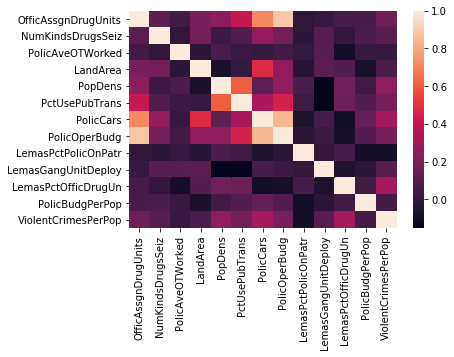

In [50]:
sns.heatmap(dataset_other_with_crimes.corr())

Te współczynniki nie są zbyt silnie skorelowane z ilością przestępstw. Warto też wspomieć, że część z nich jest mocno wybrakowana. Najbardziej powiązany z cechą jest współczynnik ``PolicCars``.

### Dane najbardziej znaczące dla szukanego współczynnika przestępstw

Poniżej poszukiwać będziemy cech najbardziej powiązanych z naszą zmienną objaśnianą.

In [51]:
dataset_train = dataset.loc[:, 'population':'PolicBudgPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_education_with_viol_crimes = pd.concat([dataset_train, viol_crimes], axis=1)

CORR_THRESHOLD_VALUE = 0.3

corr = dataset_education_with_viol_crimes.corr()
(corr[corr["ViolentCrimesPerPop"] > CORR_THRESHOLD_VALUE]["ViolentCrimesPerPop"]).sort_values(ascending=False)

ViolentCrimesPerPop    1.000000
PctKidsBornNeverMar    0.738089
racepctblack           0.628368
pctWPubAsst            0.563107
FemalePctDiv           0.537303
TotalPctDiv            0.536549
PctPolicBlack          0.513569
MalePctDivorce         0.510456
PctPopUnderPov         0.505349
PctUnemployed          0.483441
PctVacantBoarded       0.479910
PctHousNoPhone         0.473718
PctNotHSGrad           0.467596
PctHousLess3BR         0.454470
PctPolicMinor          0.416418
PctPersDenseHous       0.395856
PctLess9thGrade        0.371422
PctLargHouseFam        0.341601
LemasPctOfficDrugUn    0.318474
MedRentPctHousInc      0.315537
PolicCars              0.313164
PctWOFullPlumb         0.311227
Name: ViolentCrimesPerPop, dtype: float64

In [52]:
corr_top = corr[corr["ViolentCrimesPerPop"] > CORR_THRESHOLD_VALUE]["ViolentCrimesPerPop"]
corr_top

racepctblack           0.628368
pctWPubAsst            0.563107
PctPopUnderPov         0.505349
PctLess9thGrade        0.371422
PctNotHSGrad           0.467596
PctUnemployed          0.483441
MalePctDivorce         0.510456
FemalePctDiv           0.537303
TotalPctDiv            0.536549
PctKidsBornNeverMar    0.738089
PctLargHouseFam        0.341601
PctPersDenseHous       0.395856
PctHousLess3BR         0.454470
PctVacantBoarded       0.479910
PctHousNoPhone         0.473718
PctWOFullPlumb         0.311227
MedRentPctHousInc      0.315537
PctPolicBlack          0.513569
PctPolicMinor          0.416418
PolicCars              0.313164
LemasPctOfficDrugUn    0.318474
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64

Wykres przedstawiający najbardziej znaczące cechy. Dla czytelności zostały przedstawione tylko najważiesze współczynniki.

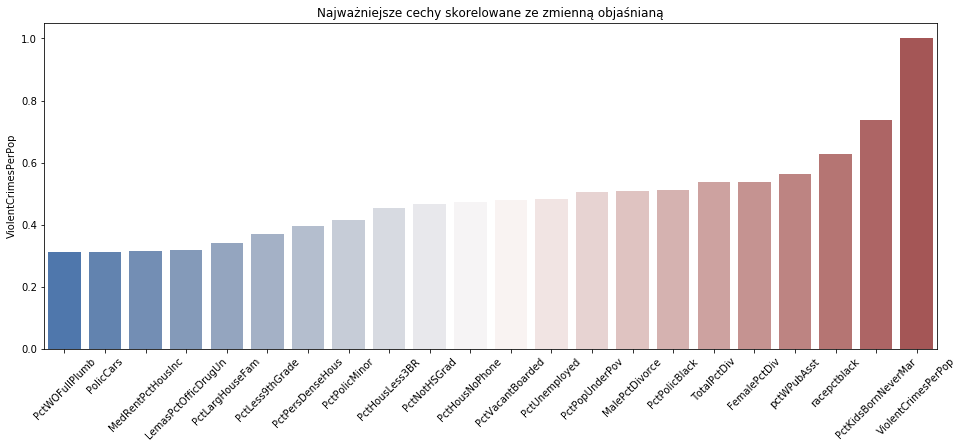

In [53]:
sorted_coef = corr_top.sort_values()

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy skorelowane ze zmienną objaśnianą')

Poniżej poszukiwać będziemy cech najbardziej powiązanych z naszą zmienną objaśnianą.

In [54]:
dataset_train = dataset.loc[:, 'population':'PolicBudgPerPop']
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
dataset_education_with_viol_crimes = pd.concat([dataset_train, viol_crimes], axis=1)

NEG_CORR_THRESHOLD_VALUE = -0.3

corr = dataset_education_with_viol_crimes.corr()
(corr[corr["ViolentCrimesPerPop"] < NEG_CORR_THRESHOLD_VALUE]["ViolentCrimesPerPop"]).sort_values(ascending=True)

PctKids2Par          -0.728059
PctFam2Par           -0.698641
racePctWhite         -0.676849
PctYoungKids2Par     -0.658436
PctTeen2Par          -0.655628
pctWInvInc           -0.557787
PctPersOwnOccup      -0.507330
RacialMatchCommPol   -0.469374
PctHousOwnOcc        -0.455359
medFamInc            -0.411864
medIncome            -0.397407
PctPolicWhite        -0.392584
MedNumBR             -0.347150
PctOccupMgmtProf     -0.324431
PctEmploy            -0.317644
perCapInc            -0.315256
Name: ViolentCrimesPerPop, dtype: float64

In [55]:
corr_top = corr[corr["ViolentCrimesPerPop"] < NEG_CORR_THRESHOLD_VALUE]["ViolentCrimesPerPop"]
corr_top

racePctWhite         -0.676849
medIncome            -0.397407
pctWInvInc           -0.557787
medFamInc            -0.411864
perCapInc            -0.315256
PctEmploy            -0.317644
PctOccupMgmtProf     -0.324431
PctFam2Par           -0.698641
PctKids2Par          -0.728059
PctYoungKids2Par     -0.658436
PctTeen2Par          -0.655628
PctPersOwnOccup      -0.507330
MedNumBR             -0.347150
PctHousOwnOcc        -0.455359
RacialMatchCommPol   -0.469374
PctPolicWhite        -0.392584
Name: ViolentCrimesPerPop, dtype: float64

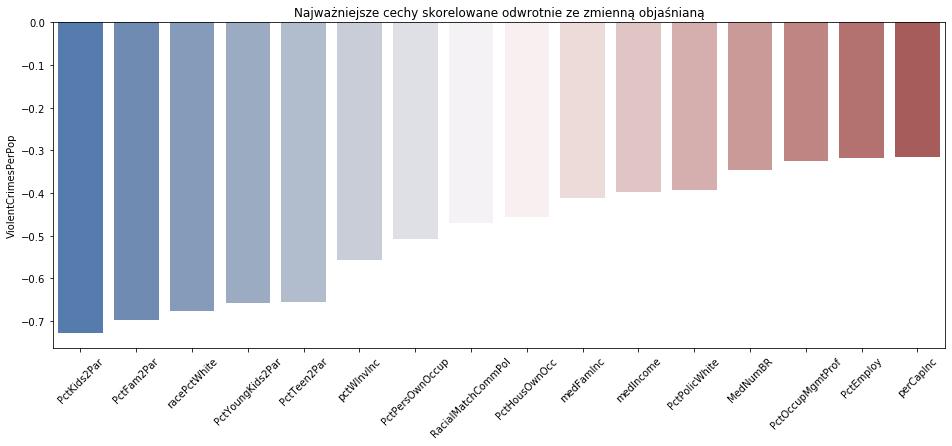

In [56]:
sorted_coef = corr_top.sort_values(ascending=True)

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy skorelowane odwrotnie ze zmienną objaśnianą')

#### Wnioski

Na podstawie wyświetlonych powyżej zmiennych możemy wysnuć wniosek, że najbardziej znaczącą jest zmienna ``PctKidsBornNeverMar``, najbardziej odwrotnie proporcjonalna jest ``PctKids2Par``.

Wiele z wylistowanych zmiennych może być zaskakujących, chociażby zmienna ``FemalePctDiv``.

Z wypisanych zmiennych wynika duży wpływ sytuacji rodziennej oraz finansowej. 

Uwagę zwraca też, że zmienna ``RacialMatchCommPol`` jest znacząca względem spodziewanej liczby przestępstw. Wynika z tego, że im większe podobieństwo na stopniu pochodzenia rasowego pracowników policji oraz społeczeństwa tym mniejsza liczba przestępstw.

### Wizualizacja danych 

#### Wykresy przedstawiające liczbę przestęstw na 100 tysięcy osób

In [57]:
crimedata_state = dataset.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

data1 = dict(type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'Przestępstwa bez użycia siły na 100 tys. osób.'}
        )

layout1 = dict(
        title = 'Liczba przestępstw bez użycia siły(non-Violent Crimes) z podziałem na stany',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )

In [58]:
fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

In [59]:
data2 = dict(type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype(float),
        colorbar = {'title':'Przestępstwa z użyciem siły na 100 tys. osób.'}
        )

layout2 = dict(
        title = 'Liczba przestępstw z użyciem siły(Violent Crimes) z podziałem na stany',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )

In [60]:
fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

#### Pobranie danych dotyczących długości i szerowkości geograficznej gmin i miast

Za pomocą API https://opencagedata.com/ zostały pobrane współrzędne geograficzne miast oraz gmin, a następnie umieszczone zostały w pliku ``../Data/cities.txt``. 

#### Wykresy przedstawiające społeczności z największym współczynnikiem przestępstw

In [61]:
cities_dataset = pd.read_csv('../Data/cities_dataset.txt')

In [62]:
viol_crimes = dataset.loc[:, 'ViolentCrimesPerPop']
non_viol_crimes = dataset.loc[:, 'nonViolPerPop']

cities_with_crime_dataset = pd.concat([cities_dataset, non_viol_crimes, viol_crimes], axis=1)

In [63]:
cities_with_crime_dataset.head()

,communityname,state,lat,lng,nonViolPerPop,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,40.683435,-74.442653,1394.59,41.02
1,Marpletownship,PA,39.977611,-75.378526,1955.95,127.56
2,Tigardcity,OR,45.430747,-122.771934,6167.51,218.59
3,Gloversvillecity,NY,43.052813,-74.343690,NaN,306.64
4,Bemidjicity,MN,47.478542,-94.890787,9988.79,NaN


In [64]:
dl = cities_with_crime_dataset.shape[0]
df = cities_with_crime_dataset.copy().sort_values(by='nonViolPerPop', ascending=False)

df['text'] = df.apply(lambda row: row.communityname + '\n ' + str(row.nonViolPerPop), axis = 1) 
limits = [(51, 100), (31, 50), (16, 30), (6, 15), (0, 5)]
colors = ['#fde8e8', '#f6a2a2', '#ed4545', '#d11515', '#5d0909']
cities = []
scale = 100

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['nonViolPerPop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Społeczności z największym współczynnikiem przestępstw bez użycia siły ' + 
                     '(non-Violent Crimes). <br>Numer w legendzie oznacza pozycję w posortowanej liście.',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            )
    )

fig.show()

In [65]:
dl = cities_with_crime_dataset.shape[0]
df = cities_with_crime_dataset.copy().sort_values(by='ViolentCrimesPerPop', ascending=False)

df['text'] = df.apply(lambda row: row.communityname + '\n ' + str(row.nonViolPerPop), axis = 1) 
limits = [(51, 100), (31, 50), (16, 30), (6, 15), (0, 5)]
colors = ['#fde8e8', '#f6a2a2', '#ed4545', '#d11515', '#5d0909']
cities = []
scale = 25

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['ViolentCrimesPerPop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Społeczności z największym współczynnikiem przestępstw z użyciem siły' +  
                     '(Violent Crimes). <br>Numer w legendzie oznacza pozycję w posortowanej liście.',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            )
    )

fig.show()

## Hipoteza badawcza

Na podstawie przeprowadzonej wcześniej analizy danych opisujących dane społeczności, policji oraz przestępstw na terenie USA można postawić hipotezę mówiącą że, wspołczynnik przestępstw jest zależny od cech społeczności oraz cech posterunków policji.

W ramach hipotezy stwierdzamy, że największy wpływ na współczynnik przestępstw ma sytuacja rodzinna oraz finansowa ludzi zamieszkałych w społeczności. Bardzo znaczące są dane dotyczące ilości rozwodów oraz dane dotyczące dzieci oraz ich sytuacji.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

## Model regresji

### Wczytanie danych znormalizowanych

In [67]:
columns = [ "state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop" ]
loaded_dataset = pd.read_csv("../Data/communities.data", names=columns)

Wymiary wczytanych danych.

In [68]:
loaded_dataset.shape

(1994, 128)

Zamiana znaku ``?`` na wartość ``np.nan``.

In [69]:
loaded_dataset.replace("?", np.nan, inplace=True)

In [70]:
loaded_dataset.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [71]:
loaded_dataset.info(verbose=False, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


### Przygotowanie zbioru danych

Usunięcie rekordów zawierających braki w danych. W tym przypadku w kolumnie ``OtherPerCap`` jest tylko jeden rekord, który nie posiada wartości, zostanie on zatem usunięty.

In [72]:
na_index = loaded_dataset[loaded_dataset['OtherPerCap'].isna()]
loaded_dataset = loaded_dataset.drop(na_index.index)

In [73]:
number_o_nulls = loaded_dataset.isna().sum(axis=0)
for i in range (0, loaded_dataset.shape[1]):
    if number_o_nulls[i] > 0:
        print(loaded_dataset.columns[i], number_o_nulls[i])       

county 1173
community 1176
LemasSwornFT 1674
LemasSwFTPerPop 1674
LemasSwFTFieldOps 1674
LemasSwFTFieldPerPop 1674
LemasTotalReq 1674
LemasTotReqPerPop 1674
PolicReqPerOffic 1674
PolicPerPop 1674
RacialMatchCommPol 1674
PctPolicWhite 1674
PctPolicBlack 1674
PctPolicHisp 1674
PctPolicAsian 1674
PctPolicMinor 1674
OfficAssgnDrugUnits 1674
NumKindsDrugsSeiz 1674
PolicAveOTWorked 1674
PolicCars 1674
PolicOperBudg 1674
LemasPctPolicOnPatr 1674
LemasGangUnitDeploy 1674
PolicBudgPerPop 1674


W pozostałych kolumnach liczba rekordów z brakującymi wartościami przekracza ``500``, zatem zostaną usunięte te kolumny.

In [74]:
loaded_dataset = loaded_dataset.dropna(axis='columns')

Usunięcie kolumn ``communityname`` oraz ``fold``, ponieważ nie zawierają one informacji potrzebnych przy budowie modelu.

In [75]:
dataset = loaded_dataset.drop(columns=['communityname', 'fold'])

Zamiana kolumn typu ``object`` na ``numeric``.

In [76]:
for column in dataset.columns:
    if (dataset[column].dtype == object): 
        dataset[column] = pd.to_numeric(dataset[column])

In [77]:
dataset.info(verbose=False, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Columns: 102 entries, state to ViolentCrimesPerPop
dtypes: float64(101), int64(1)
memory usage: 1.6 MB


Podział zbioru na zbiór atrybutów ``X`` oraz wektor zmiennej objaśnianej ``y``.

In [78]:
X = dataset.loc[:, 'state':'LemasPctOfficDrugUn']
y = dataset.loc[:, 'ViolentCrimesPerPop']

Podział na zbiór treningowy i testowy.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [80]:
r2_train = []
r2_test = []
mse_train = []
mse_test = []
zero = []

### Regresja liniowa

Pierwszy model jaki zastosujemy do naszych danych to model regresji liniowej. Miara tego modelu wyświetlona poniżej to wartość funkcji ``r2`` dla danych treningowych.

In [81]:
reg = LinearRegression().fit(X_train, y_train)
r2_train_lr = reg.score(X_train, y_train)
r2_train.append(r2_train_lr)
r2_train_lr

0.6964936021036026

Miara ``MSE`` dla danych treningowych.

In [82]:
y_train_pred = reg.predict(X_train)
mse_train_lr = mean_squared_error(y_train_pred, y_train)
mse_train.append(mse_train_lr)
mse_train_lr

0.016563889580986275

Miara ``r2`` dla danych testowych.

In [83]:
r2_test_lr = reg.score(X_test, y_test)
r2_test.append(r2_test_lr)
r2_test_lr

0.6786554454399927

Miara ``MSE`` dla danych testowych.

In [84]:
y_pred = reg.predict(X_test)
mse_test_lr = mean_squared_error(y_pred, y_test)
mse_test.append(mse_test_lr)
mse_test_lr

0.01705660587127516

Wartość wyrazu wolnego w regresji.

In [85]:
reg.intercept_

0.6684692502727416

In [86]:
results = pd.DataFrame(data={'coefficients':reg.coef_}, index=dataset.columns[0:-1].values)
zero.append(len(results[results['coefficients'] == 0]))
len(results[results['coefficients'] == 0])

0

In [87]:
THRESHOLD_VALUE = 0.3
NEG_THRESHOLD_VALUE = -0.3

Atrybuty, które miały największy wpływ na model.

In [88]:
results[results['coefficients'] > 0.3 ].sort_values(by='coefficients', ascending=True)

,coefficients
OwnOccMedVal,0.303932
MedRent,0.317411
MalePctDivorce,0.361364
medFamInc,0.370102
PctRecImmig8,0.399754
PersPerOccupHous,0.458269
PctHousOwnOcc,0.730792


In [89]:
results[results['coefficients'] < -0.3 ].sort_values(by='coefficients')

,coefficients
PctPersOwnOccup,-0.823703
OwnOccLowQuart,-0.435229
TotalPctDiv,-0.346504
PctKids2Par,-0.345970
whitePerCap,-0.338481
numbUrban,-0.304760


In [90]:
results_top = results[results['coefficients'].abs() > 0.1]
results_top

,coefficients
population,0.296024
racepctblack,0.195847
agePct12t29,-0.227043
agePct16t24,-0.136175
numbUrban,-0.304760
medIncome,-0.266892
pctWWage,-0.198390
pctWInvInc,-0.177050
medFamInc,0.370102
perCapInc,0.110978


Wykres przedstawiający najbardziej znaczące cechy. Dla czytelności zostały przedstawione tylko najważiesze współczynniki.

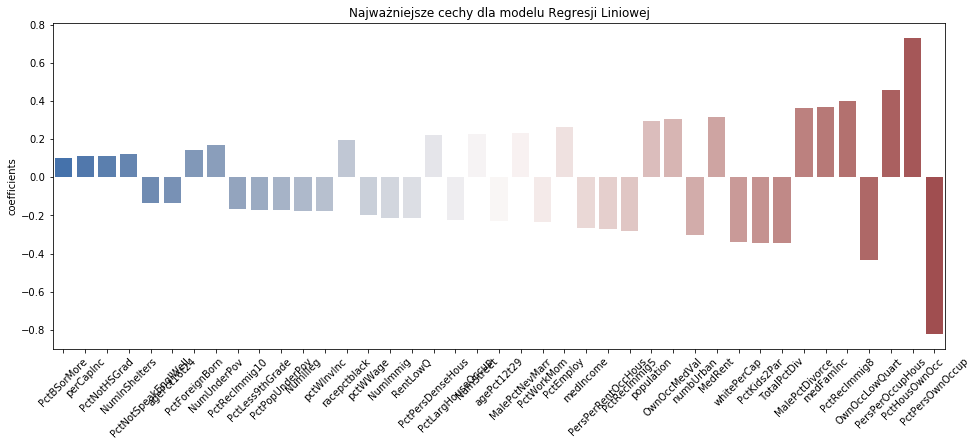

In [91]:
sorted_coef = results_top.reindex(results_top['coefficients']
                              .abs()
                              .sort_values()
                              .index)

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef.coefficients, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy dla modelu Regresji Liniowej')

### Regresja Ridge

Drugi model jaki zastosujemy do naszych danych to model regresji liniowej z regularyzacją normą L2. Miara tego modelu wyświetlona poniżej to wartość funkcji ``r2`` dla danych treningowych.

In [92]:
reg=Ridge(alpha=1.0).fit(X_train, y_train)
reg.score(X_train, y_train)

0.6908567213372201

Kolejnym krokiem było zastosowanie walidacji krzyżowej do znalezienia najlepszego parametru $\alpha$.

In [93]:
parameters = {'alpha':[0.1, 0.3, 1, 2, 2.5, 2.8, 3, 3.3, 3.8, 4.5, 10]}
reg = GridSearchCV(Ridge(max_iter=100000), parameters, cv=5, scoring='r2')
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 1, 2, 2.5, 2.8, 3, 3.3, 3.8, 4.5,
                                   10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

Najlepszy znaleziony estymator.

In [94]:
reg.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Wartość funkcji ``r2`` dla danych treningowych.

In [95]:
r2_train_lr = reg.score(X_train, y_train)
r2_train.append(r2_train_lr)
r2_train_lr

0.6908567213372201

Wartość funkcji ``mse`` dla danych treningowych.

In [96]:
y_train_pred = reg.predict(X_train)
mse_train_lr = mean_squared_error(y_train_pred, y_train)
mse_train.append(mse_train_lr)
mse_train_lr

0.01687152286727837

Wartość funkcji ``r2`` dla danych testowych.

In [97]:
r2_test_lr = reg.score(X_test, y_test)
r2_test.append(r2_test_lr)
r2_test_lr

0.6818640061197402

Wartość funkcji ``mse`` dla danych testowych.

In [98]:
y_pred = reg.predict(X_test)
mse_test_lr = mean_squared_error(y_pred, y_test)
mse_test.append(mse_test_lr)
mse_test_lr

0.016886299095722486

Wyraz wolny estymatora.

In [99]:
reg.best_estimator_.intercept_

0.610666104723226

In [100]:
results = pd.DataFrame(data={'coefficients':reg.best_estimator_.coef_}, index=dataset.columns[0:-1].values)
zero.append(len(results[results['coefficients'] == 0]))
len(results[results['coefficients'] == 0])

0

Atrybuty, które najbardziej wpływały na nasz model.

In [101]:
results[results['coefficients'] > 0.1].sort_values(by='coefficients', ascending=True)

,coefficients
NumInShelters,0.100116
HousVacant,0.110453
PctIlleg,0.125977
PctEmploy,0.130898
MalePctNevMarr,0.136058
PersPerOccupHous,0.139219
PctPersDenseHous,0.150332
MalePctDivorce,0.159350
MedRent,0.160894
racepctblack,0.179358


In [102]:
results[results['coefficients'] < -0.1 ].sort_values(by='coefficients')

,coefficients
PctWorkMom,-0.177803
PctKids2Par,-0.176849
RentLowQ,-0.173673
agePct12t29,-0.156680
whitePerCap,-0.140489
pctWInvInc,-0.138631
PctLess9thGrade,-0.131454
PctPopUnderPov,-0.129000
OwnOccLowQuart,-0.125311
NumImmig,-0.117740


In [103]:
results_top = results[results['coefficients'].abs() > 0.1]
results_top

,coefficients
racepctblack,0.179358
agePct12t29,-0.156680
pctWWage,-0.106380
pctWInvInc,-0.138631
whitePerCap,-0.140489
PctPopUnderPov,-0.129000
PctLess9thGrade,-0.131454
PctEmploy,0.130898
MalePctDivorce,0.159350
MalePctNevMarr,0.136058


Wykres przedstawiający najbardziej znaczące cechy. Dla czytelności zostały przedstawione tylko najważiesze współczynniki.

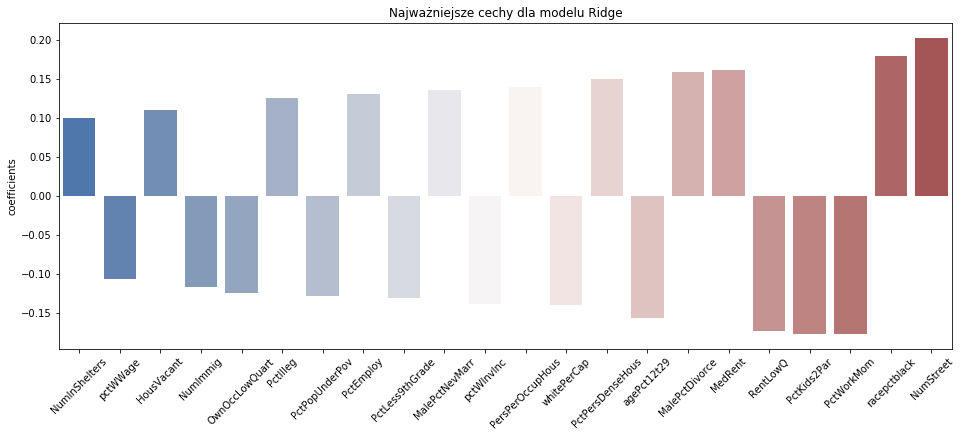

In [104]:
sorted_coef = results_top.reindex(results_top['coefficients']
                              .abs()
                              .sort_values()
                              .index)

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef.coefficients, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy dla modelu Ridge')

### Lasso Regression

Następnym modelem który przetestujemy jest model wykorzystujący regresję Lasso. Ponownie użyjemy walidacji krzyżowej w celu znalezienia współczynnika α najlepiej dopasowującego nasz model do danych uczących.

In [105]:
reg=Lasso(alpha=0.01).fit(X_train, y_train)
reg.score(X_train, y_train)

0.5643586918942829

In [106]:
parameters = {'alpha':[0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001, 0.000003, 0.000001]}
reg = GridSearchCV(Lasso(max_iter=100000), parameters, cv=5, scoring='r2')
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.003, 0.001, 0.0003, 0.0001, 3e-05, 1e-05,
                                   3e-06, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

Wyświetlamy najlepszy estymator:

In [107]:
reg.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Możemy odczytać wartość ``α``, która została wybrana. Sprawdzamy jaki wynik uzyskaliśmy dla zbioru treningowego oraz jaki jest błąd średniokwadratowy:

In [108]:
r2_train_lr = reg.score(X_train, y_train)
r2_train.append(r2_train_lr)
r2_train_lr

0.6873634340345782

In [109]:
y_train_pred = reg.predict(X_train)
mse_train_lr = mean_squared_error(y_train_pred, y_train)
mse_train.append(mse_train_lr)
mse_train_lr

0.017062169343124236

Następnie dokonujemy predykcji dla zbioru testowego i sprawdzamy skuteczność oraz błąd średniokwadratowy:

In [110]:
r2_test_lr = reg.score(X_test, y_test)
r2_test.append(r2_test_lr)
r2_test_lr

0.681334105271229

In [111]:
y_pred = reg.predict(X_test)
mse_test_lr = mean_squared_error(y_pred, y_test)
mse_test.append(mse_test_lr)
mse_test_lr

0.016914425634030516

Wartość wyrazu wolnego w naszym modelu:

In [112]:
reg.best_estimator_.intercept_

0.6149090856507025

Ilość wyzerowanuch współczynników dla konkretnych cech:

In [113]:
results = pd.DataFrame(data={'coefficients':reg.best_estimator_.coef_}, index=dataset.columns[0:-1].values)
zero.append(len(results[results['coefficients'] == 0]))
len(results[results['coefficients'] == 0])

31

Widzimy, że część cech ma zerowe współczynniki - jest to zaleta regresji Lasso.

Największy wpływ na nasz model mają:

In [114]:
results[results['coefficients'] > 0.1].sort_values(by='coefficients', ascending=True)

,coefficients
PctEmploy,0.101380
HousVacant,0.104963
MalePctNevMarr,0.131993
PctIlleg,0.140806
MalePctDivorce,0.144479
PctPersDenseHous,0.149199
racepctblack,0.181888
MedRent,0.188396
NumStreet,0.207390


Odwrotnie za to wpływają:

In [115]:
results[results['coefficients'] < -0.1 ].sort_values(by='coefficients')

,coefficients
PctKids2Par,-0.249934
agePct12t29,-0.197078
RentLowQ,-0.168732
PctWorkMom,-0.160148
PctPopUnderPov,-0.116147
pctWInvInc,-0.115151
NumImmig,-0.113432


In [116]:
results_top = results[results['coefficients'].abs() > 0.1]
results_top

,coefficients
racepctblack,0.181888
agePct12t29,-0.197078
pctWInvInc,-0.115151
PctPopUnderPov,-0.116147
PctEmploy,0.101380
MalePctDivorce,0.144479
MalePctNevMarr,0.131993
PctKids2Par,-0.249934
PctWorkMom,-0.160148
PctIlleg,0.140806


Wykres przedstawiający najbardziej znaczące cechy. Dla czytelności zostały przedstawione tylko najważiesze współczynniki.

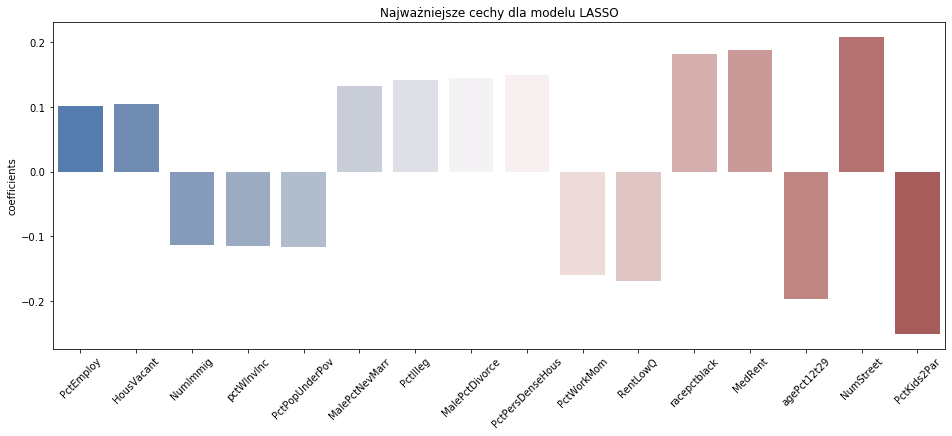

In [117]:
sorted_coef = results_top.reindex(results_top['coefficients']
                              .abs()
                              .sort_values()
                              .index)

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef.coefficients, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy dla modelu LASSO')

### Elastic Net

Ostatnim modelem który przetestujemy jest model wykorzystujący regresję ElasticNet. Metoda ta łączy ze sobą regresje Lasso oraz Ridge.
Znów posłużymy się walidacją krzyżową w celu znalezienia współczynnika $\alpha$ oraz l1_ratio najlepiej dopasowującego nasz model do danych uczących.

In [118]:
reg=ElasticNet(alpha=0.01).fit(X_train, y_train)
reg.score(X_train, y_train)

0.6142257956446358

In [119]:
parameters = {'alpha':[0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001], 
             'l1_ratio':[0.01, 0.03, .05, 0.07, .1, .15, 0.2, .5, .9]}
reg = GridSearchCV(ElasticNet(max_iter=100000), parameters, cv=5, scoring='r2')
reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=100000,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.003, 0.001, 0.0003, 0.0001, 3e-05, 1e-05],
                         'l1_ratio': [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2,
                                      0.5, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

Najlepszy estymator, jego wynik oraz błąd:

In [120]:
reg.best_estimator_

ElasticNet(alpha=0.0003, copy_X=True, fit_intercept=True, l1_ratio=0.15,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
r2_train_lr = reg.score(X_train, y_train)
r2_train.append(r2_train_lr)
r2_train_lr

0.6902775967608586

In [122]:
y_train_pred = reg.predict(X_train)
mse_train_lr = mean_squared_error(y_train_pred, y_train)
mse_train.append(mse_train_lr)
mse_train_lr

0.016903128644299784

Następnie dokonujemy predykcji dla zbioru testowego i sprawdzamy skuteczność oraz błąd średniokwadratowy:

In [123]:
r2_test_lr = reg.score(X_test, y_test)
r2_test.append(r2_test_lr)
r2_test_lr

0.6817204971691769

In [124]:
y_pred = reg.predict(X_test)
mse_test_lr = mean_squared_error(y_pred, y_test)
mse_test.append(mse_test_lr)
mse_test_lr

0.01689391638866871

Wartość wyrazu wolnego w naszym modelu:

In [125]:
reg.best_estimator_.intercept_

0.6113774782376384

Ilość wyzerowanuch współczynników dla konkretnych cech:

In [126]:
results = pd.DataFrame(data={'coefficients':reg.best_estimator_.coef_}, index=dataset.columns[0:-1].values)
zero.append(len(results[results['coefficients'] == 0]))
len(results[results['coefficients'] == 0])

20

Widzimy, że i w tym przypadku część współczynników została wyzerowana.

Cechy mające największy wpływ na nasz model:

In [127]:
results[results['coefficients'] > 0.1].sort_values(by='coefficients', ascending=True)

,coefficients
HousVacant,0.116988
PctIlleg,0.131001
PctEmploy,0.131486
PersPerOccupHous,0.139175
MalePctNevMarr,0.144564
PctPersDenseHous,0.154689
MalePctDivorce,0.160949
racepctblack,0.184476
MedRent,0.195607
NumStreet,0.208025


Cechy mające największy odwrotny wpływ na nasz model:

In [128]:
results[results['coefficients'] < -0.1 ].sort_values(by='coefficients')

,coefficients
PctKids2Par,-0.227773
agePct12t29,-0.205871
PctWorkMom,-0.179875
RentLowQ,-0.173917
pctWInvInc,-0.133148
PctPopUnderPov,-0.123893
PctLess9thGrade,-0.121388
whitePerCap,-0.120440
NumImmig,-0.118302
pctWWage,-0.116357


In [129]:
results_top = results[results['coefficients'].abs() > 0.1]
results_top

,coefficients
racepctblack,0.184476
agePct12t29,-0.205871
pctWWage,-0.116357
pctWInvInc,-0.133148
whitePerCap,-0.120440
PctPopUnderPov,-0.123893
PctLess9thGrade,-0.121388
PctEmploy,0.131486
MalePctDivorce,0.160949
MalePctNevMarr,0.144564


Wykres przedstawiający najbardziej znaczące cechy. Dla czytelności zostały przedstawione tylko najważiesze współczynniki.

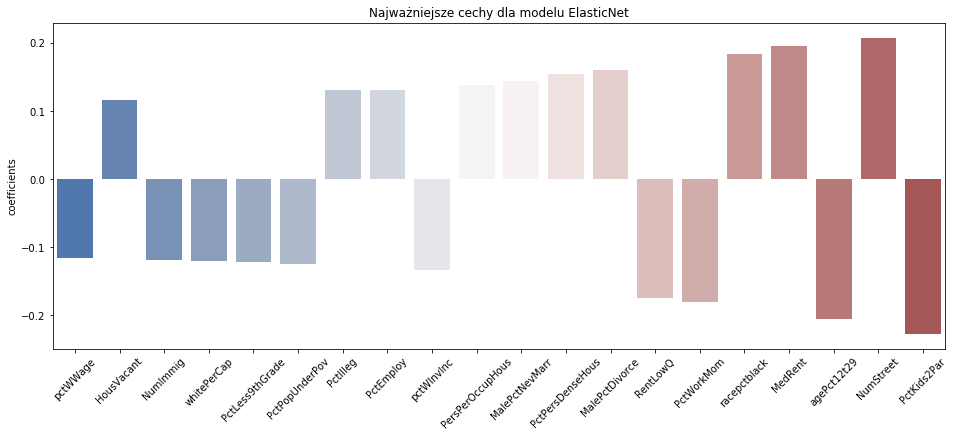

In [130]:
sorted_coef = results_top.reindex(results_top['coefficients']
                              .abs()
                              .sort_values()
                              .index)

plt.figure(figsize=(16, 6))
plot = sns.barplot(x=sorted_coef.index, y=sorted_coef.coefficients, palette="vlag")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
title = plot.set_title('Najważniejsze cechy dla modelu ElasticNet')

### Najlepszy model

In [131]:
reg_names = ['Linear', 'Ridge', 'LASSO', 'ElasticNet']
data = {'r2 zbiór treningowy':r2_train, 'r2 zbiór testowy':r2_test, 'mse zbiór treningowy':mse_train, 'mse zbiór testowy':mse_test, 'liczba wyzerowanych współczyników':zero}

In [132]:
def highlight_max_green(s):
    is_max = s == s.max()
    return ['background-color: #c0fa93' if v else '' for v in is_max]

def highlight_max_yellow(s):
    is_max = s == s.max()
    return ['background-color: #ffc157' if v else '' for v in is_max]

In [133]:
def highlight_min_green(s):
    is_min = s == s.min()
    return ['background-color: #c0fa93' if v else '' for v in is_min]

def highlight_min_yellow(s):
    is_min = s == s.min()
    return ['background-color: #ffc157' if v else '' for v in is_min]

In [134]:
results_df = pd.DataFrame(data=data, index=reg_names)
results_df = (results_df.style.apply(highlight_max_green, subset = ['r2 zbiór treningowy', 'r2 zbiór testowy','liczba wyzerowanych współczyników'])
              .apply(highlight_min_green, subset = ['mse zbiór treningowy', 'mse zbiór testowy'])
              .apply(highlight_min_yellow, subset = ['r2 zbiór treningowy', 'r2 zbiór testowy','liczba wyzerowanych współczyników'])
              .apply(highlight_max_yellow, subset = ['mse zbiór treningowy', 'mse zbiór testowy']))
results_df

,r2 zbiór treningowy,r2 zbiór testowy,mse zbiór treningowy,mse zbiór testowy,liczba wyzerowanych współczyników
Linear,0.696494,0.678655,0.0165639,0.0170566,0
Ridge,0.690857,0.681864,0.0168715,0.0168863,0
LASSO,0.687363,0.681334,0.0170622,0.0169144,31
ElasticNet,0.690278,0.68172,0.0169031,0.0168939,20


Najlepsza wartość w danej kolumnie zaznaczona jest na zielono, a najgorsza na pomarańczowo.

W przypadku naszych danych najlepiej dopasowany do danych treningowych jest model Regresji Liniowej.

Widać jednak, że na danych testowych dużo lepsze wyniki osiągają Regresory stosujące regularyzaję. W przypadku tego podziału na zbiory testowe oraz treningowe najlepszy okazał się Regresor ``Ridge``.

Widać również, że Regresory ``LASSO`` oraz ``ElasticNet`` wyzerowały pewną liczbę współczynników.

## Rozwój projektu

Projekt może być rozwijany w kilku obszarach:
1. Dodanie cech łączących posiadane.
2. Dołączenie danych z innych źródeł, np. więcej danych dotyczących policji.
3. Wypróbowanie innych modeli, np. drzew decyzyjnych lub sieci neuronowych.